<a href="https://colab.research.google.com/github/Akshay2224/Uber_Request_Data/blob/master/Uber_Supply_EDA_Rpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber_Supply_Demand_Gap

## Introduction

Uber Technologies, Inc. is an American multinational transportation network company offering services that include peer-to-peer ridesharing, ride service hailing, food delivery, and a bicycle-sharing system. The company is based in San Francisco and has operations in 785 metropolitan areas worldwide.

![alt text](http://www.brooklynvegan.com/files/2018/08/uber.jpg))

## Problems Faced

The problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations. We need to  decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue. 

## Problem Statement

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  

 

In [0]:
# Importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
import datetime

In [0]:
#opening of file
df=pd.read_csv('https://github.com/Akshay2224/Uber_Request_Data/raw/master/Uber%20Request%20Data.csv')

In [3]:
#Lets Head towards looking the dataset
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


## Attribute Description

There are six attributes associated with each request made by a customer:

1. Request id: A unique identifier of the request.
2. Time of request: The date and time at which the customer made the trip request
3. Drop-off time: The drop-off date and time, in case the trip was completed 
4. Pick-up point: The point from which the request was made
5. Driver id: The unique identification number of the driver
6. Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

## Some Stats about the dataset

In [4]:
# To get a description about the dataset
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


#### We can see that number of request id are 6745 where 6766 is highest number of id alloted whereas we can see that Maximum number of driver Id is 300 and we have total 4095 drivers.

In [5]:
#To see the number of rows and columns
df.shape

(6745, 6)

In [6]:
#To check the name of columns 
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

### Data Quality

#### Lets us check the date and time columns

In [7]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp']) # Converted the column Request timestamp to datetime format
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp']) # Converted the column Drop timestamp to datetime format
df['Day']=df['Request timestamp'].dt.month # Created new column with the name of Day having month number of request timestamp
df['Day1']=df['Drop timestamp'].dt.month # Created new column with the name of Day having month number of Drop timestamp
df['Monthdif']=df['Day']-df['Day1'] # Month Diffrence columns
df1=df.query('Monthdif==-1')
df1['B']=1
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Day1,Monthdif,B
75,1346,Airport,9.0,Trip Completed,2016-11-07 23:39:00,2016-12-07 00:23:00,11,12.0,-1.0,1
390,1353,Airport,40.0,Trip Completed,2016-11-07 23:51:00,2016-12-07 00:34:00,11,12.0,-1.0,1
578,1349,Airport,61.0,Trip Completed,2016-11-07 23:41:00,2016-12-07 00:22:00,11,12.0,-1.0,1
911,1351,Airport,94.0,Trip Completed,2016-11-07 23:44:00,2016-12-07 00:49:00,11,12.0,-1.0,1
927,1344,City,96.0,Trip Completed,2016-11-07 23:35:00,2016-12-07 00:39:00,11,12.0,-1.0,1


#### Here it is visible from the data that there is some anomaly as because of some typographic error the month has changed abruptly by one which cannot be possible as there cannot be 1 month travelling time So we need to change this anomaly

In [8]:
df1['Request timestamp']=df1['Request timestamp']+df1['B'].values.astype("timedelta64[M]") #Adding to the number of months in the column Request time stamp
df1['Request timestamp']=df1['Request timestamp']-df1['B'].values.astype("timedelta64[D]") #Subtracting to the number of days in the column Request time stamp
# Here we are adding hours to the time in Request timestamp column because after addition/Subtraction of months the time has changed
df1['Request timestamp']=df1['Request timestamp']+datetime.timedelta(hours=13)
df1['Request timestamp']=df1['Request timestamp']+datetime.timedelta(minutes=31)
df1['Request timestamp']=df1['Request timestamp']-datetime.timedelta(seconds=6)
df1.drop(['Day','Day1','Monthdif','B'],axis=1)
df.update(df1) #Updating the data
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Day1,Monthdif
0,619.0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11.0,11.0,0.0
1,867.0,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11.0,11.0,0.0
2,1807.0,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12.0,12.0,0.0
3,2532.0,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12.0,12.0,0.0
4,3112.0,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7.0,7.0,0.0


#### Here we can see that the now this anomaly is removed but there is some another problem as follows in the data -:

In [9]:
df2=df.query('Monthdif!=0&Monthdif!=-1')
df2.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day,Day1,Monthdif
133,2675.0,Airport,15.0,Trip Completed,2016-12-07 23:43:00,2016-07-13 00:35:12,12.0,7.0,5.0
143,2661.0,Airport,16.0,Trip Completed,2016-12-07 23:23:00,2016-07-13 00:27:21,12.0,7.0,5.0
245,2667.0,Airport,25.0,Trip Completed,2016-12-07 23:35:00,2016-07-13 00:40:52,12.0,7.0,5.0
532,2665.0,Airport,55.0,Trip Completed,2016-12-07 23:30:00,2016-07-13 00:37:17,12.0,7.0,5.0
656,2664.0,Airport,69.0,Trip Completed,2016-12-07 23:26:00,2016-07-13 00:01:12,12.0,7.0,5.0


#### There is another problem with the month as here it can be possible that time and date of request timestamp column has replaced with each other so we need to remove this anomaly also

In [10]:
df2['D']=5.0
df2['C']=4
df2['Request timestamp']=df2['Request timestamp']-df2['D'].values.astype("timedelta64[M]")#Adding to the number of months in the column Request time stamp
df2['Request timestamp']=df2['Request timestamp']+df2['C'].values.astype("timedelta64[D]")#Subtracting to the number of Days in the column Request time stamp
# Here we are adding hours to the time in Request timestamp column because after addition/Subtraction of months the time has changed
df2['Request timestamp']=df2['Request timestamp']+datetime.timedelta(hours=4)
df2['Request timestamp']=df2['Request timestamp']+datetime.timedelta(minutes=26)
df2['Request timestamp']=df2['Request timestamp']-datetime.timedelta(seconds=30)
df.update(df2)
df=df.drop(['Day','Day1','Monthdif'],axis=1)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619.0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867.0,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807.0,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532.0,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112.0,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


#### Now the data has been cleaned properly.

## Deriving New Columns

In [0]:
df['Session']=df['Request timestamp'].dt.hour.apply(lambda x:"Night" if x<6  else ("Morning" if x<12 else("Afternoon" if x<18 else("Evening"))))

In [12]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Session
0,619.0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Morning
1,867.0,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Afternoon
2,1807.0,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning
3,2532.0,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Evening
4,3112.0,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning


In [0]:
df['Destination']=df['Pickup point'].apply(lambda x:"City-Airport" if x=='City'else("Airport-City"))

In [0]:
df['Availability']=df['Status'].apply(lambda x:"Not Available" if x=='No Cars Available' else("Available"))

In [15]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Session,Destination,Availability
0,619.0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Morning,Airport-City,Available
1,867.0,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Afternoon,Airport-City,Available
2,1807.0,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning,City-Airport,Available
3,2532.0,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Evening,Airport-City,Available
4,3112.0,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,City-Airport,Available


In [0]:
df['Request Hour']=df['Request timestamp'].dt.hour

In [17]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Session,Destination,Availability,Request Hour
0,619.0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Morning,Airport-City,Available,11
1,867.0,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Afternoon,Airport-City,Available,17
2,1807.0,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Morning,City-Airport,Available,9
3,2532.0,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Evening,Airport-City,Available,21
4,3112.0,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,City-Airport,Available,8


## Datatypes Used

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null float64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Session              6745 non-null object
Destination          6745 non-null object
Availability         6745 non-null object
Request Hour         6745 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 527.0+ KB


#### It is visible from the above analysis that there are 2 type of float type columns , 2 datetime type columns and also 2 object type columns

In [19]:
#To check the number of unique values in each columns of dataset
df.apply( lambda x: len(x.unique()))

Request id           6745
Pickup point            2
Driver id             301
Status                  3
Request timestamp    6029
Drop timestamp       2599
Session                 4
Destination             2
Availability            2
Request Hour           24
dtype: int64

#### Here we can see that there are 3 type of status value and 2 type of Pickpoint Value.

## Identifying th Pressing Problems

### 1. Pickup Point

In [20]:
df['Destination'].describe()

count             6745
unique               2
top       City-Airport
freq              3507
Name: Destination, dtype: object

#### Here we can see that  maximum Destinations is from City.-Airport

In [21]:
df1=df.groupby('Destination').size()
df1

Destination
Airport-City    3238
City-Airport    3507
dtype: int64

#### There are 3238 times from which theDestination is Airport- City whereas  there are 3507 times from which the destination is from City -Airport

Text(0.5, 1.0, 'Destination')

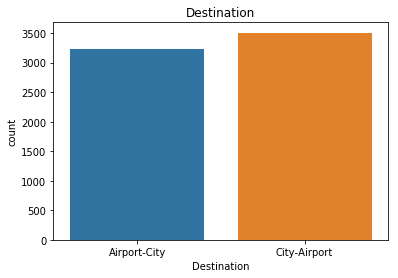

In [22]:
k=sns.countplot(df['Destination'])
k.set_title('Destination')

#### The Destination are nearly equal to each other according to the graph

([<matplotlib.patches.Wedge at 0x7fc70f6f62e8>,
 [Text(0.06886506273679674, 1.0978422487471764, 'Airport-City'),
  Text(-0.06886516552420652, -1.097842242299559, 'City-Airport')],
 [Text(0.03756276149279821, 0.5988230447711871, '48.0%'),
  Text(-0.0375628175586581, -0.5988230412543049, '52.0%')])

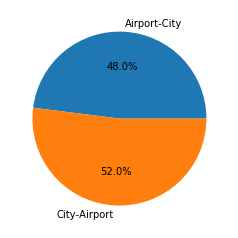

In [23]:
pie(df1,labels=df1.index,autopct='%1.1f%%')

#### From the above graph it is visible that 52 % times the Destination is from City- Airport whereas 48 % time the Destination is from Airport- City

### Status

In [24]:
df['Status'].describe()


count               6745
unique                 3
top       Trip Completed
freq                2831
Name: Status, dtype: object

#### It is visible from the above analysis that mostly the Trip has completed that is 2831 times.

In [25]:
df2=df.groupby('Status').size()
df2

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
dtype: int64

#### There are 1264 times the Request from costumer has been Cancelled  whereas 2650 times there are No cars available whereas 2831 times , the trip has been completed

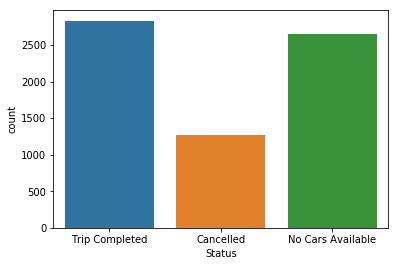

In [26]:
sns.countplot(df['Status'])

#### Here it can be seen that the trips completed and No cars Available has the maximum frequency.

([<matplotlib.patches.Wedge at 0x7fc70f60e0b8>,
 [Text(0.9148122117335421, 0.6108343615606322, 'Cancelled'),
  Text(-0.8197978372292601, 0.7334381405914392, 'No Cars Available'),
  Text(0.27450168572516787, -1.0651989600699212, 'Trip Completed')],
 [Text(0.49898847912738653, 0.3331823790330721, '18.7%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.3%'),
  Text(0.1497281922137279, -0.5810176145835932, '42.0%')])

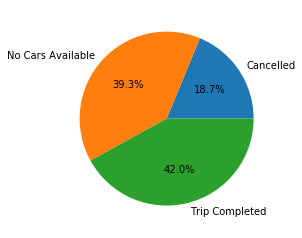

In [27]:
pie(df2,labels=df2.index,autopct='%1.1f%%')

#### So from the above analysis it is visible that 39.3 % times when the user putted a car request there were no cars available whereas 18.7 % times the trip was cancelled whereas 42 % times the trip was completed from the total request.

## Session

In [28]:
df['Session'].describe()

count        6745
unique          4
top       Evening
freq         2422
Name: Session, dtype: object

#### Here it is visible that the maximum time the Request has been made in Evening times that is 2422 times

In [29]:
df3=df.groupby('Session').size()
df3

Session
Afternoon    1228
Evening      2422
Morning      2072
Night        1023
dtype: int64

#### Here we can see the distribution of the requests made according to the sessions as we can see that maximum times the request is made on Evening that is 2422 times whereas on night the requests are made minimum times that is 1023 times.

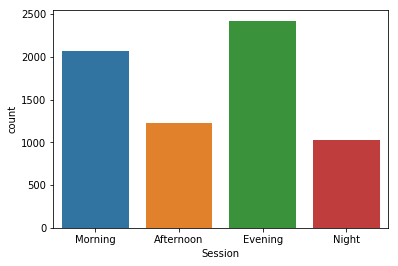

In [30]:
sns.countplot(df['Session'])

#### From here we can see the visualiztion on the column session also

([<matplotlib.patches.Wedge at 0x7fc70cd1d908>,
 [Text(0.9249253418358186, 0.5954100368904561, 'Afternoon'),
  Text(-0.7096577400126294, 0.8404676626974815, 'Evening'),
  Text(-0.3743225163513971, -1.034351320273899, 'Morning'),
  Text(0.977476988688673, -0.5045183213562455, 'Night')],
 [Text(0.5045047319104464, 0.32476911103115785, '18.2%'),
  Text(-0.3870860400068887, 0.45843690692589895, '35.9%'),
  Text(-0.20417591800985296, -0.5641916292403085, '30.7%'),
  Text(0.533169266557458, -0.2751918116488612, '15.2%')])

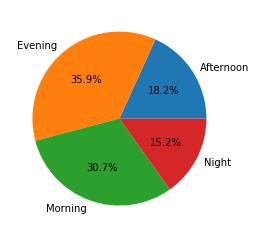

In [31]:
pie(df3,labels=df3.index,autopct='%1.1f%%')

#### From the above visualization, we can see that 35.9% of requests are made on Evening whereas 30.7% of requests made on Morning . 

### Availability

In [32]:
df['Availability'].describe()

count          6745
unique            2
top       Available
freq           4095
Name: Availability, dtype: object

#### Here it can be noted that about 4095 times the cars are available.

In [33]:
df4=df.groupby('Availability').size()
df4

Availability
Available        4095
Not Available    2650
dtype: int64

#### In the above analysis we can see the above distribution that the number of times the cars were available are more than they are not available.

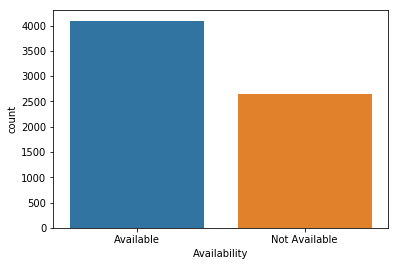

In [34]:
sns.countplot(df['Availability'])

#### Here we can see that number of available cars at the time of request are more than the number of car not availabe at that time.

([<matplotlib.patches.Wedge at 0x7fc70cc367b8>,
 [Text(-0.36322067218241233, 1.0383018555792707, 'Available'),
  Text(0.3632207693952466, -1.0383018215720925, 'Not Available')],
 [Text(-0.19812036664495217, 0.5663464666796022, '60.7%'),
  Text(0.1981204196701345, -0.5663464481302322, '39.3%')])

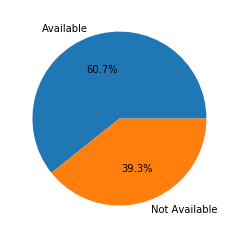

In [35]:
pie(df4,labels=df4.index,autopct='%1.1f%%')

#### Accorrding to the above graph we can say that 60.7% times the cars are available and 39.3 % times the cars are not available

### Gap between supply and demand

### Request Hour Time slot

Text(0.5, 1.0, 'Request Hour')

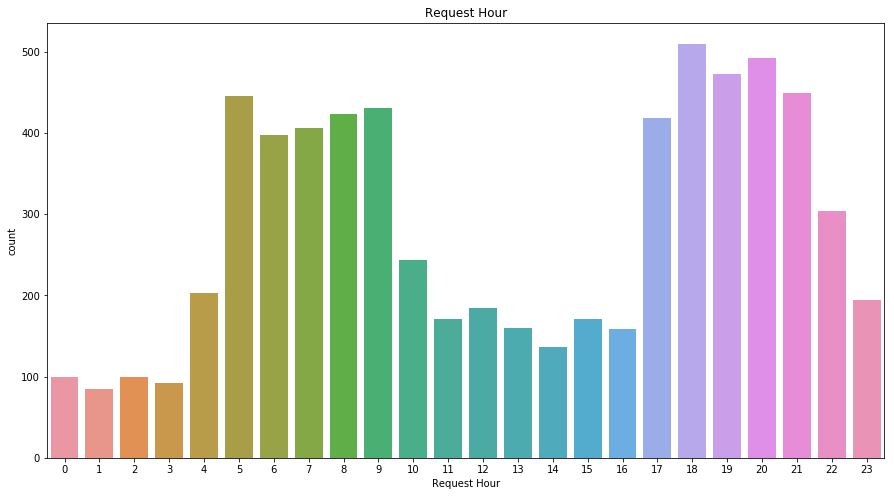

In [36]:
plt.figure(figsize=(15,8))
k=sns.countplot(df['Request Hour'])
k.set_title('Request Hour')

#### It can be seen from the table that at time 5- 9 A.M and 17-21 P.M the request for the cab is maximum whereas it is minimum at 0-4 A.M and 10-16 P.M

In [37]:
p=df.groupby('Request Hour').size()
p

Request Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
dtype: int64

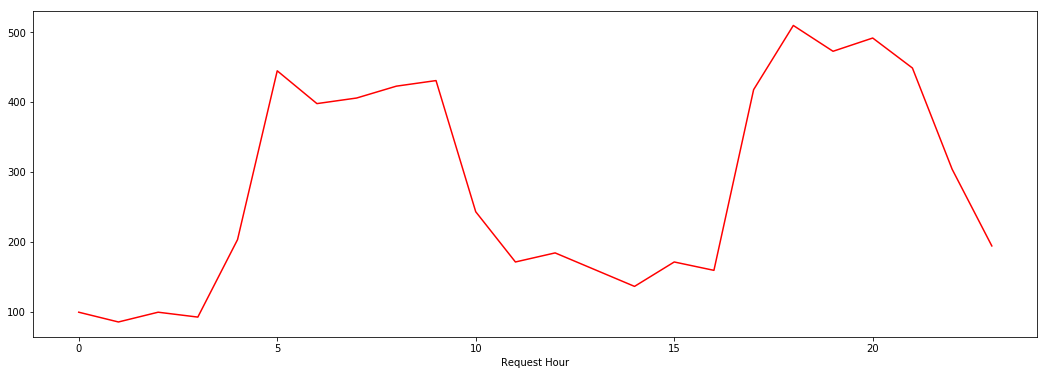

In [38]:
plt.figure(figsize=(18,6))
sns.lineplot(y=p,x=p.index,color='Red')

#### Here it is visible that it is maximum during 5-10 A.M and at  4-8 P.M

In [0]:
from statsmodels.graphics.mosaicplot import mosaic

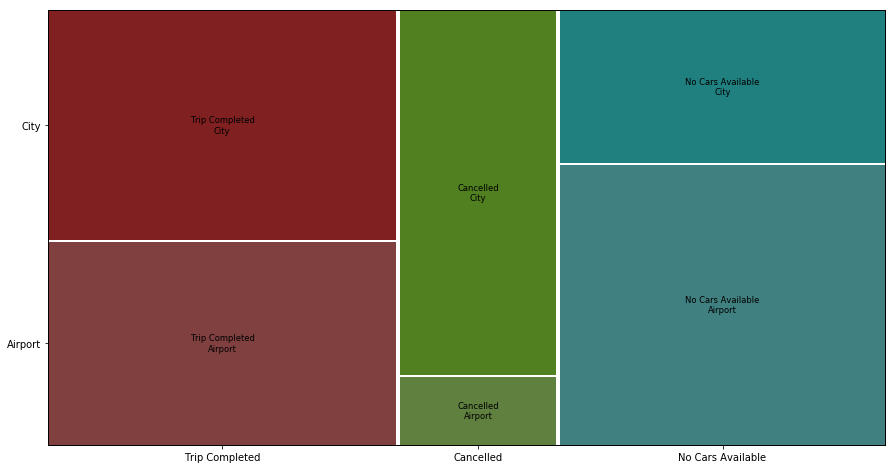

In [40]:
plt.rcParams['figure.figsize'] = (15,8)
mosaic(df, ['Status', 'Pickup point'])
plt.show()

#### It tells that the Trip Completed for City and Airport are nearly equal whereas for Cancelled for city as a pickup point whereas From whereas Airport maximum times the Cars are not available. 

### Request time and Destinations

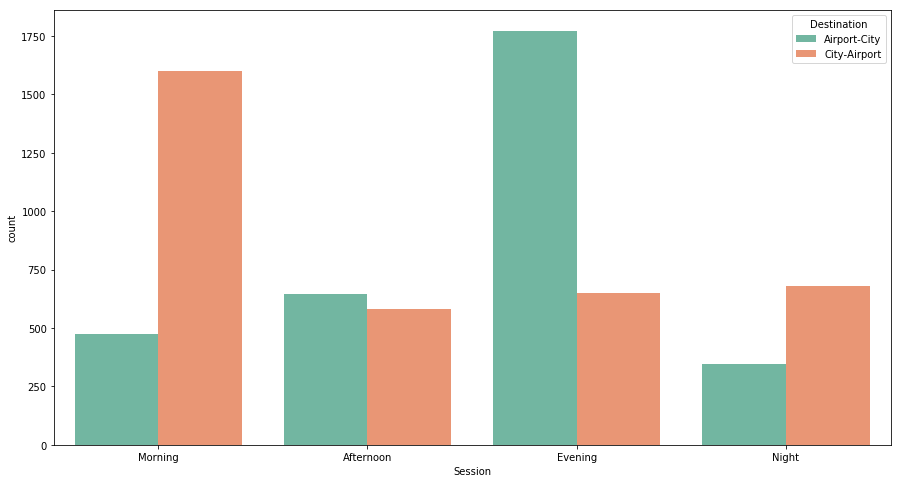

In [41]:
sns.countplot(x=df['Session'],hue=df['Destination'],palette = 'Set2')

#### Here it is visible that on Morning the destination is prefferably City-Airport whereas in Evening the destination is prefferably is Airport-City 